Alex Albaugh.  Wayne State.  CHE 5995/7507.  Lecture 21.  Winter 2026.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy

# **Gaussian Distribution**

The Gaussian distribution, known as the normal distribution or bell curve, has the mathematical form $\rho(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$.  Here we'll visualize the Maxwell-Boltzmann distribution, a special case of the Gaussian distribution that gives the probability denisty of a velocity component of a molecule at temperature $T$.

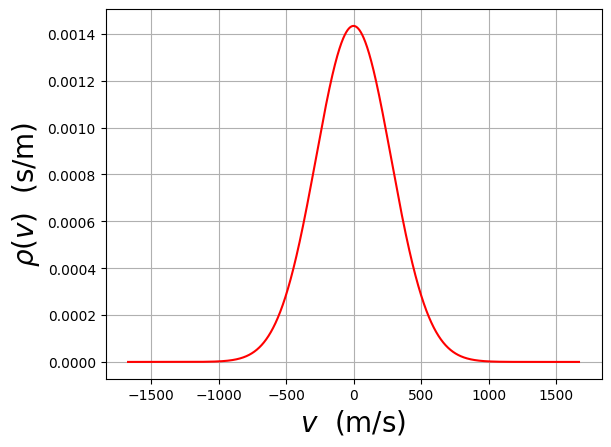

In [2]:
mass = 5.31 * 10**(-26) #mass of O2 in kg
kB = 1.38 * 10**(-23) #J/K Boltzmann constant
T = 298.0 #K

mu = 0.0 # mean
sigma = np.sqrt(kB*T/mass) #standard deviation

#set up a range of velocity values
v = np.linspace(mu - 6*sigma, mu + 6*sigma, 10000)

#probability denisty of velocity
rho = np.sqrt(1.0/(2.0 * math.pi * sigma**2))*np.exp( -(v-mu)**2/(2.0 * sigma**2))

#plot the probabiliy distribution
fig,ax = plt.subplots()
ax.plot(v, rho, color='r')
ax.set_xlabel('$v$  (m/s)',fontsize=20)
ax.set_ylabel('$\\rho(v)$  (s/m)',fontsize=20)
ax.grid()
plt.show()

Let's check that the probability density is normalized.  We'll use <code>np.trapezoid</code> to numerically integrate it and we should see that the integral is 1.

In [3]:
print('Integral of probability distribution: ', np.trapezoid(rho,v))

Integral of probability distribution:  0.9999999980268158


We can also draw random numbers from a probability distribution with <code>numpy</code>.  Here we'll draw random numbers from the Gaussian distribution with <code>np.random.normal</code>.

In [4]:
samples = np.random.normal(mu, sigma, 10000)

Let's calculate the mean and standard deviation of our samples compared to the true mean and standard deviation.

In [5]:
print('Mean of samples: ', np.mean(samples), ', true mean: ', mu)
print('Standard deviation of samples: ', np.std(samples), ', true standard deviation: ', sigma)

Mean of samples:  5.4585015095192135 , true mean:  0.0
Standard deviation of samples:  278.2328935693858 , true standard deviation:  278.2918031197035


We can also plot a histogram with <code>density=True</code> to visualize the distribution of our samples and we'll compare it with the true distribution.

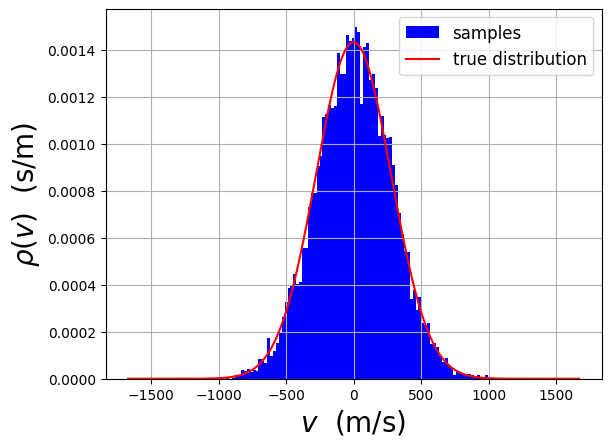

In [6]:
fig,ax = plt.subplots()
ax.hist(samples, bins=100, density=True, color='b', label='samples')
ax.plot(v, rho, color='r',label='true distribution')
ax.set_xlabel('$v$  (m/s)',fontsize=20)
ax.set_ylabel('$\\rho(v)$  (s/m)',fontsize=20)
ax.legend(fontsize=12)
ax.grid()
plt.show()

# **Multivariate Gaussian**

A multivariate Gaussian is a joint probability distribution of more than one random variables.  An example is a 2-D Gaussian where the variables are independent of each other: $\rho(x,y) = \frac{1}{ 2 \pi \sigma_{x} \sigma_{y}} e^{-\left[\frac{(x-\mu_{x})^2}{2 \sigma_{x}^2} + \frac{(y-\mu_{y})^2}{2 \sigma_{y}^2} \right]}$.

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3273445225.py:22: SyntaxWarning: invalid escape sequence '\m'
  cb.set_label('$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)


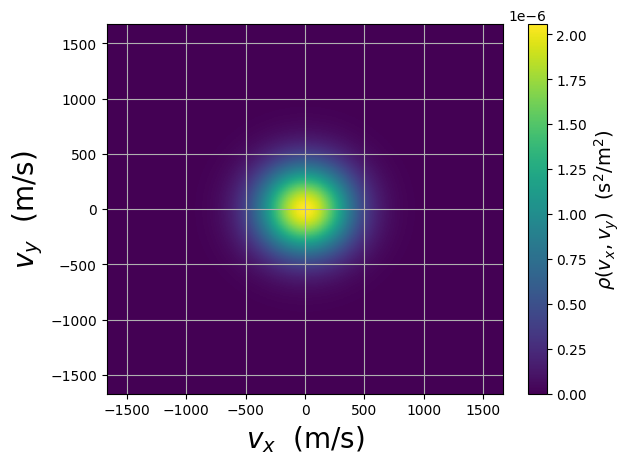

In [7]:
mass = 5.31 * 10**(-26) #mass of O2
kB = 1.38 * 10**(-23) #J/K Boltzmann constant
T = 298.0 #K

mu_x = mu_y = 0.0 # mean
sigma_x = sigma_y = np.sqrt(kB*T/mass) #standard deviation

#set up a range of velocity values
vx = np.linspace(mu_x - 6*sigma_x, mu_x + 6*sigma_x, 1000)
vy = np.linspace(mu_y - 6*sigma_y, mu_y + 6*sigma_y, 1000)

#convert to a grid for 2-D
VX, VY = np.meshgrid(vx, vy)

#2-D Gaussian function
rho = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(-((VX - mu_x)**2 / (2 * sigma_x**2) + (VY - mu_y)**2 / (2 * sigma_y**2)))

#plot the probability as a heatmap in 2-D
fig,ax = plt.subplots()
c = ax.pcolormesh(VX, VY, rho, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)
ax.set_xlabel('$v_{x}$  (m/s)',fontsize=20)
ax.set_ylabel('$v_{y}$  (m/s)',fontsize=20)
ax.grid()
plt.show()

I could visualize the probability density as a 3-D surface instead.  Here the $x$ and $y$ axes are the $v_x$ and $v_y$ velocity components and the $z$ axis is the probability density.

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-601413074.py:7: SyntaxWarning: invalid escape sequence '\m'
  cb.set_label('$\\rho(v)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)
/tmp/ipython-input-601413074.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)',fontsize=20)


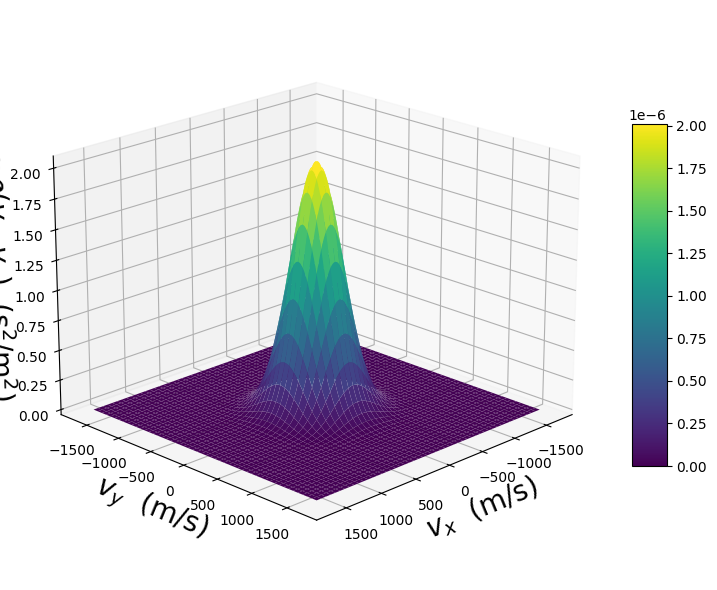

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(VX, VY, rho, cmap='viridis')

cbar = fig.colorbar(surface, shrink=0.6, aspect=10)
cb.set_label('$\\rho(v)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)

ax.set_xlabel('$v_{x}$  (m/s)',fontsize=20)
ax.set_ylabel('$v_{y}$  (m/s)',fontsize=20)
ax.set_zlabel('$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)',fontsize=20)

ax.view_init(elev=20, azim=45)

fig.tight_layout()
plt.show()

Again, let's check that the area under the density is 1 with numerical integration.

In [9]:
integral_y = np.trapezoid(rho, vy, axis=1)  #integrate along y-axis first
integral_xy = np.trapezoid(integral_y, vx)   #integrate along x-axis next
print('Integral of probability distribution: ', integral_xy)

Integral of probability distribution:  0.9999999960518964


We can also draw samples from this multivariate Gaussian with <code>np.random.multivariate_normal</code>.

In [10]:
#put the mean values into a vector
mean = [0, 0]

#build the covariance matrix
cov = [[sigma_x**2, 0.0],
       [0.0, sigma_y**2]]

#draw 100 samples
samples = np.random.multivariate_normal(mean, cov, 100)

Let's plot this on top of the true distribution.

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2686963335.py:5: SyntaxWarning: invalid escape sequence '\m'
  cb.set_label('$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)


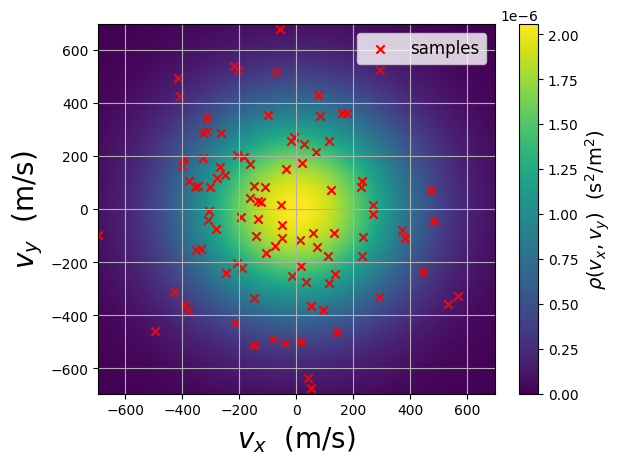

In [11]:
fig,ax = plt.subplots()

c = ax.pcolormesh(VX, VY, rho, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)

ax.scatter(samples[:,0], samples[:,1], color='r', marker='x', label='samples')

ax.set_xlabel('$v_{x}$  (m/s)',fontsize=20)
ax.set_ylabel('$v_{y}$  (m/s)',fontsize=20)
ax.set_xlim(-2.5*sigma_x, 2.5*sigma_x)
ax.set_ylim(-2.5*sigma_y, 2.5*sigma_y)
ax.legend(fontsize=12,loc='upper right')
ax.grid()
plt.show()

Let's take a lot more samples and bin them with a 2-D histogram.  Here we'll build an approximation of the true distribution with our samples.

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1214475128.py:12: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(ax.collections[0], ax=ax, label='$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)')


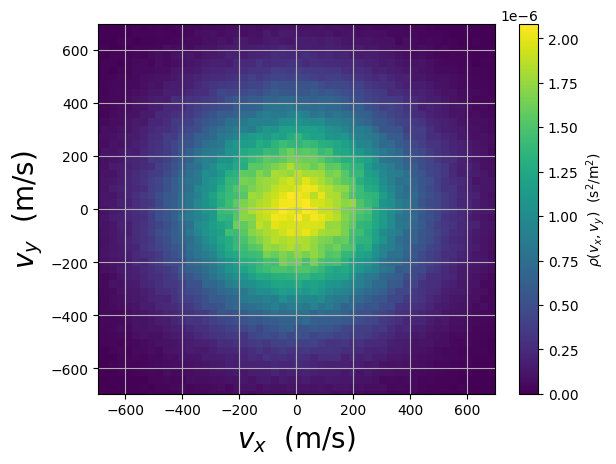

In [12]:
#draw 1,000,000 samples
samples = np.random.multivariate_normal(mean, cov, 1000000)

#build 2-D histogram with samples
fig, ax = plt.subplots()
ax.hist2d(samples[:,0], samples[:,1], bins=100, cmap='viridis', density=True)
ax.set_xlabel('$v_{x}$  (m/s)',fontsize=20)
ax.set_ylabel('$v_{y}$  (m/s)',fontsize=20)
ax.set_xlim(-2.5*sigma_x, 2.5*sigma_x)
ax.set_ylim(-2.5*sigma_y, 2.5*sigma_y)
ax.grid()
fig.colorbar(ax.collections[0], ax=ax, label='$\\rho(v_x, v_y)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)')
plt.show()

Above we saw that when we draw from the multivariate Gaussian distribution we need to specify the covariance matrix.  If our random variables are not independent the off-diagonal terms in the covariance matrix will be non-zero and we'll have correlations between our variables.  <code>SciPy</code> has a nice function for generating probability densities for multivariate Gaussians.

Let's first look at a 2-D Gaussian with positive correlations.

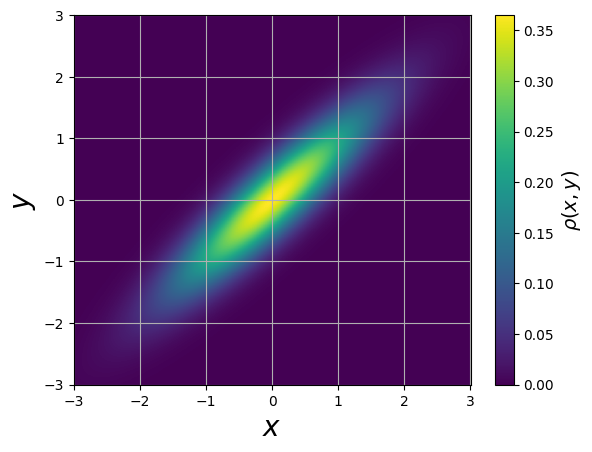

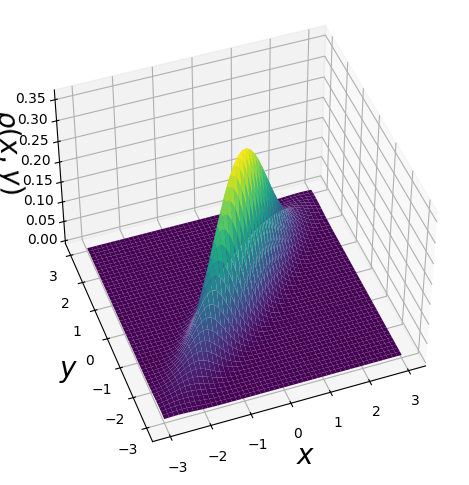

In [13]:
#mean vector
mean = [0, 0]

#covariance matrix
cov = [[1.0, 0.9],
       [0.9, 1.0]]

#build the true probability density
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

#convert to a grid for 2-D
X, Y = np.meshgrid(x, y)

#pack grid into coordinates for PDF evaluation
coords = np.dstack((X, Y))

#evaluate multivariate Gaussian on the grid
rho = scipy.stats.multivariate_normal(mean, cov).pdf(coords)

#plot the probability as a heatmap in 2-D and a surface in 3-D
fig,ax = plt.subplots()
c = ax.pcolormesh(X, Y, rho, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\rho(x,y)$', fontsize=14)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.grid()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
surface = ax2.plot_surface(X, Y, rho, cmap='viridis')
#cbar = fig2.colorbar(surface, shrink=0.6, aspect=10)
#cb.set_label('$\\rho(v)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)
ax2.set_xlabel('$x$',fontsize=20)
ax2.set_ylabel('$y$',fontsize=20)
ax2.set_zlabel('$\\rho(x,y)$',fontsize=20)
ax2.view_init(elev=45, azim=250)
fig2.tight_layout()
plt.show()

We can clearly see the correlation between $x$ and $y$.  Larger values of $y$ are more probable with larger values of $x$.  We have a positive correlation between $x$ and $y$. Let's draw some random samples from this distrubtion and see what they look like.

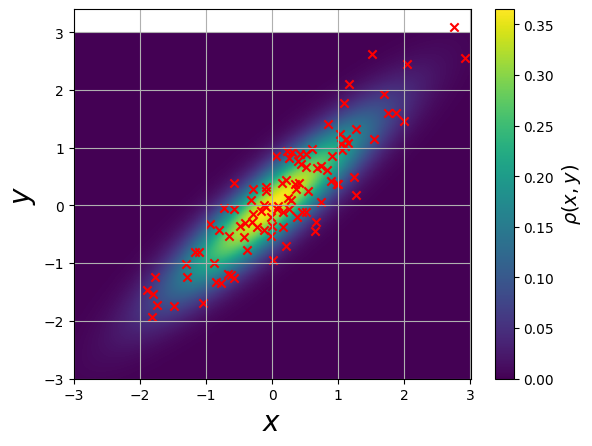

In [14]:
#draw 100 samples
samples = np.random.multivariate_normal(mean, cov, 100)

#plot on top of the true distribution
fig,ax = plt.subplots()
c = ax.pcolormesh(X, Y, rho, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\rho(x,y)$', fontsize=14)


ax.scatter(samples[:,0], samples[:,1], color='r', marker='x', label='samples')

ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.grid()

Now let's try with a negative correlation between $x$ and $y$.

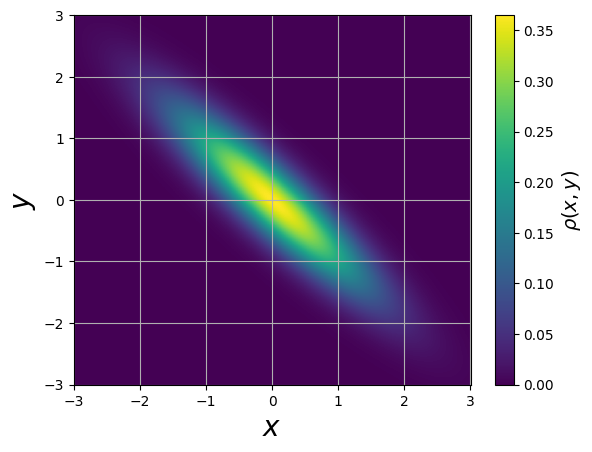

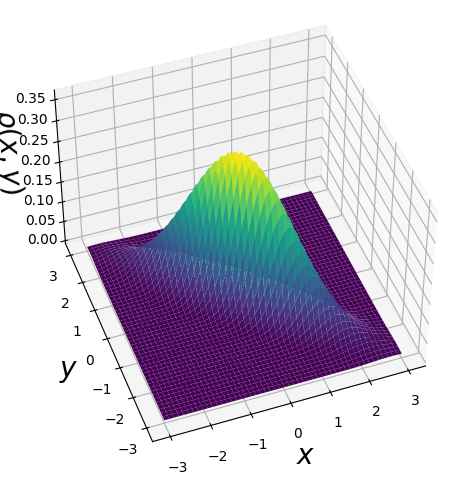

In [15]:
#mean vector
mean = [0, 0]

#covariance matrix
cov = [[1.0, -0.9],
       [-0.9, 1.0]]

#build the true probability density
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

#convert to a grid for 2-D
X, Y = np.meshgrid(x, y)

#pack grid into coordinates for PDF evaluation
coords = np.dstack((X, Y))

#evaluate multivariate Gaussian on the grid
rho = scipy.stats.multivariate_normal(mean, cov).pdf(coords)

#plot the probability as a heatmap in 2-D and a surface in 3-D
fig,ax = plt.subplots()
c = ax.pcolormesh(X, Y, rho, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\rho(x,y)$', fontsize=14)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.grid()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
surface = ax2.plot_surface(X, Y, rho, cmap='viridis')
#cbar = fig2.colorbar(surface, shrink=0.6, aspect=10)
#cb.set_label('$\\rho(v)$  ($\mathrm{s^2}$/$\mathrm{m^2}$)', fontsize=14)
ax2.set_xlabel('$x$',fontsize=20)
ax2.set_ylabel('$y$',fontsize=20)
ax2.set_zlabel('$\\rho(x,y)$',fontsize=20)
ax2.view_init(elev=45, azim=250)
fig2.tight_layout()
plt.show()

Here we see that low values of $y$ are more likely with high values of $x$, the opposite pattern from before.  We now have negative correlation between $x$ adn $y$.  Let's draw some samples and see what they look like.

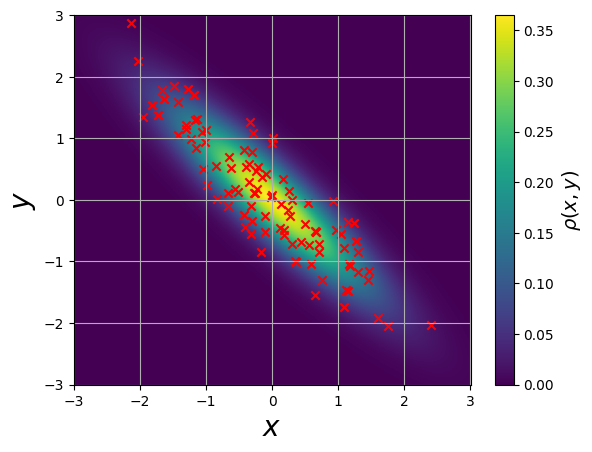

In [16]:
#draw 100 samples
samples = np.random.multivariate_normal(mean, cov, 100)

#plot on top of the true distribution
fig,ax = plt.subplots()
c = ax.pcolormesh(X, Y, rho, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label('$\\rho(x,y)$', fontsize=14)


ax.scatter(samples[:,0], samples[:,1], color='r', marker='x', label='samples')

ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.grid()
plt.show()